In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [81]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\concrete_data.csv")

In [82]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [83]:
df.shape

(1030, 9)

In [84]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [85]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [86]:
X = df.drop('Strength', axis = 1)
y = df.iloc[:,-1]

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
#Applying Regression without any transformation

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314848

In [89]:
# Cross chacking with cross val score
np.mean(cross_val_score(lr,X,y, scoring='r2'))

np.float64(0.4609940491662864)

In [90]:
lr1 = LinearRegression()
np.mean(cross_val_score(lr1,X,y, scoring='r2'))

np.float64(0.4609940491662864)

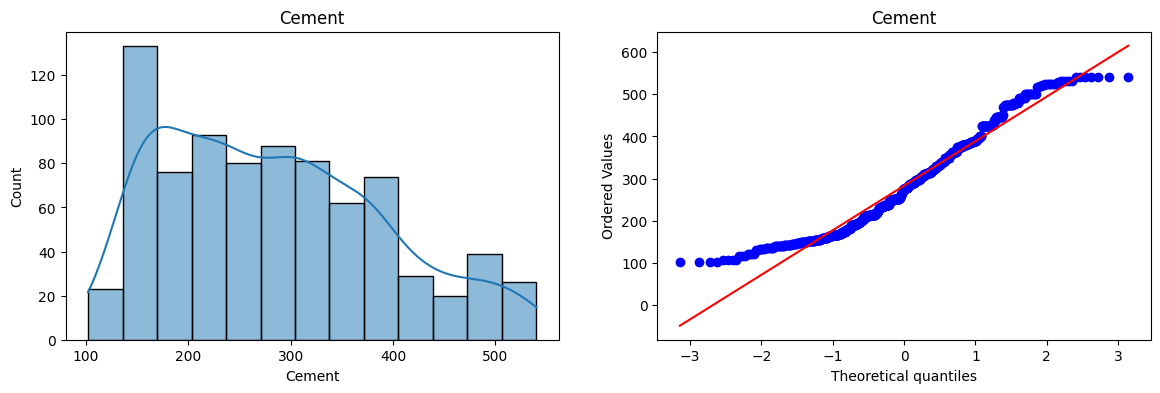

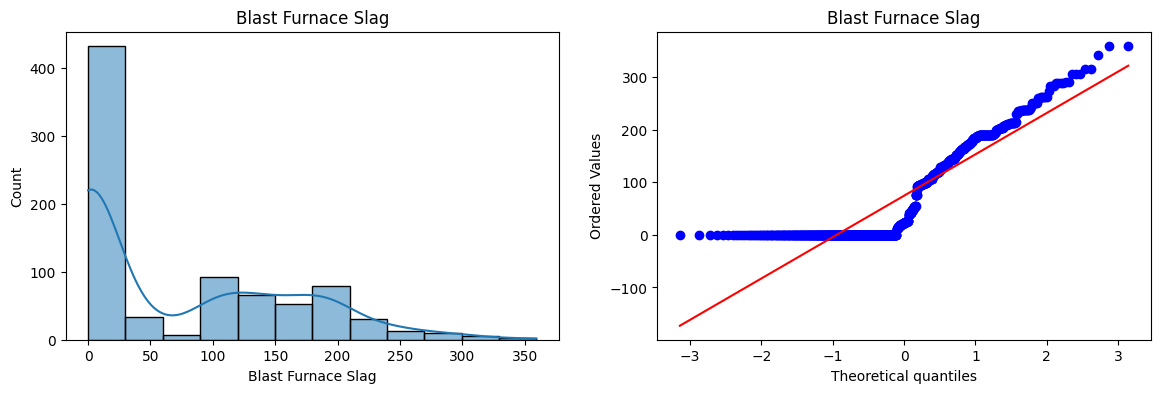

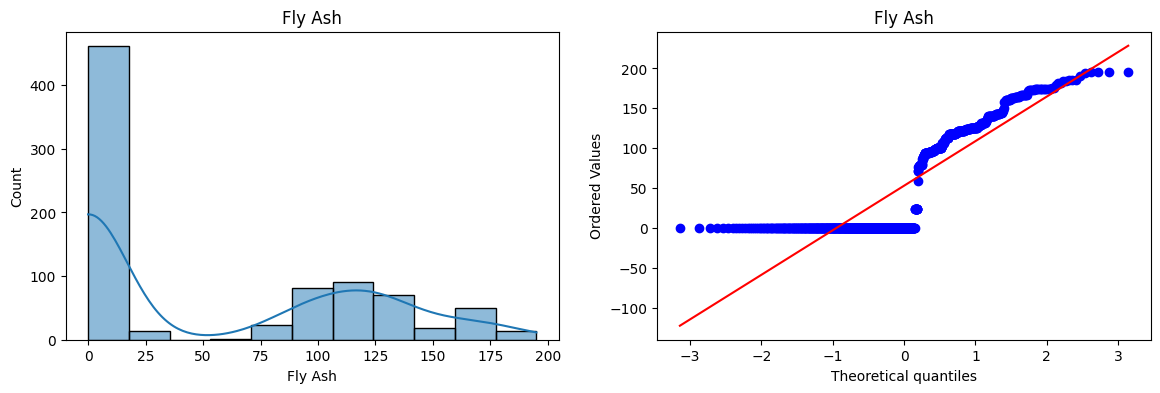

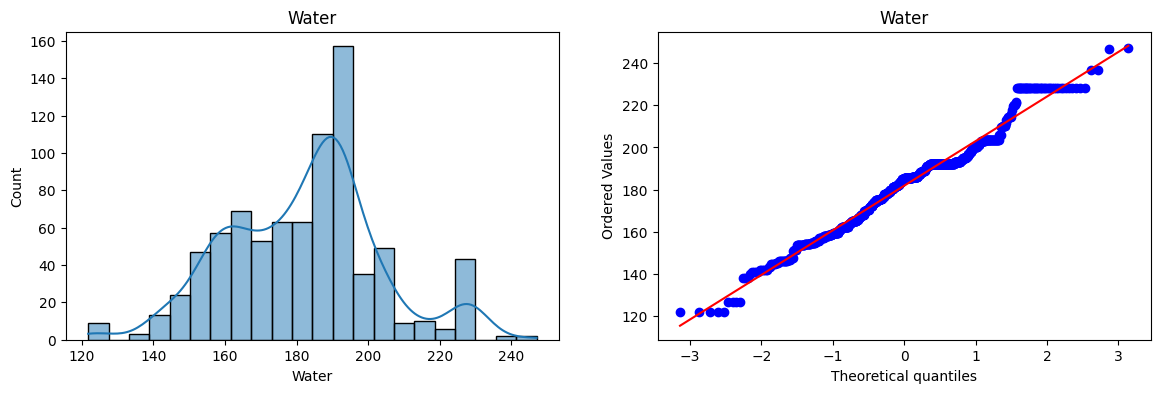

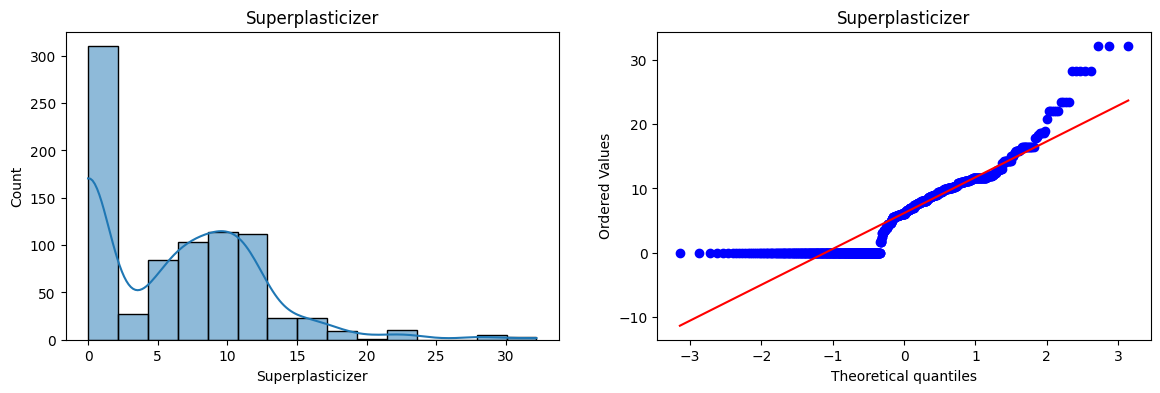

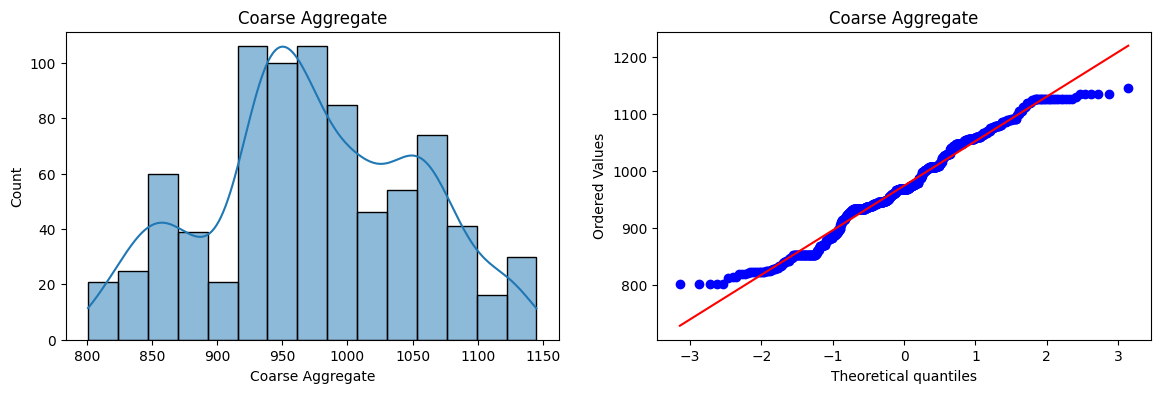

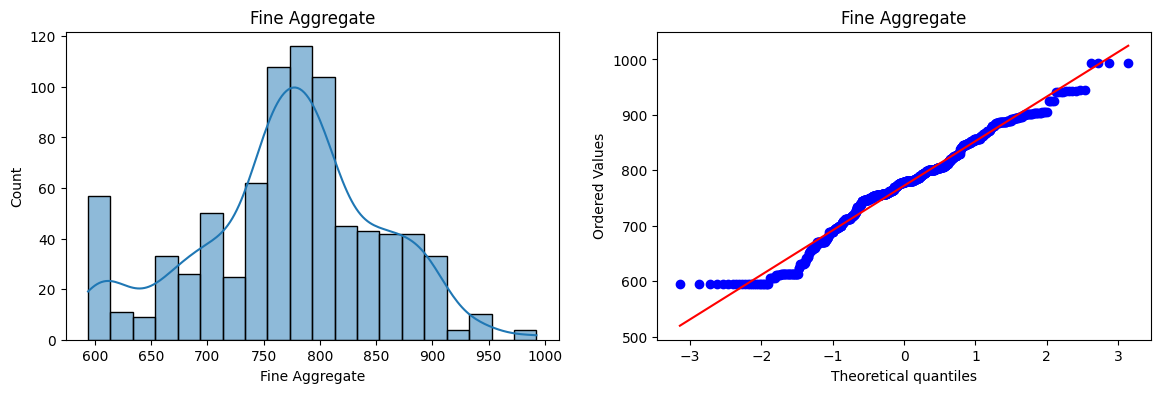

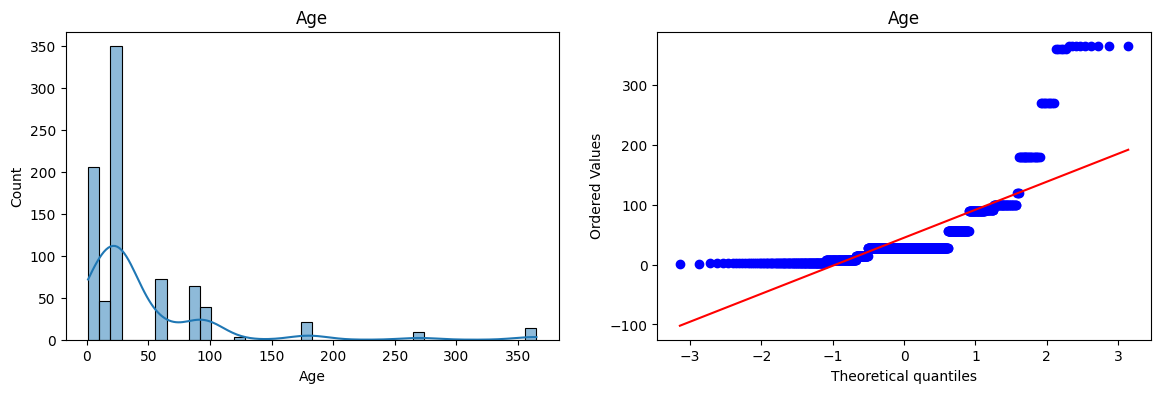

In [91]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde = True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist = 'norm', plot = plt)
    plt.title(col)

    plt.show()

# Applying Box-Cox Transform 

In [92]:
pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box-cox_lambdas':pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


# Applying linear regression on transformed data

In [93]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred = lr.predict(X_test_transformed)

r2_score(y_test,y_pred)

0.8047825011028632

In [94]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.000001)

lr = LinearRegression()

np.mean(cross_val_score(lr,X_transformed,y, scoring='r2'))


np.float64(0.6662950327179041)

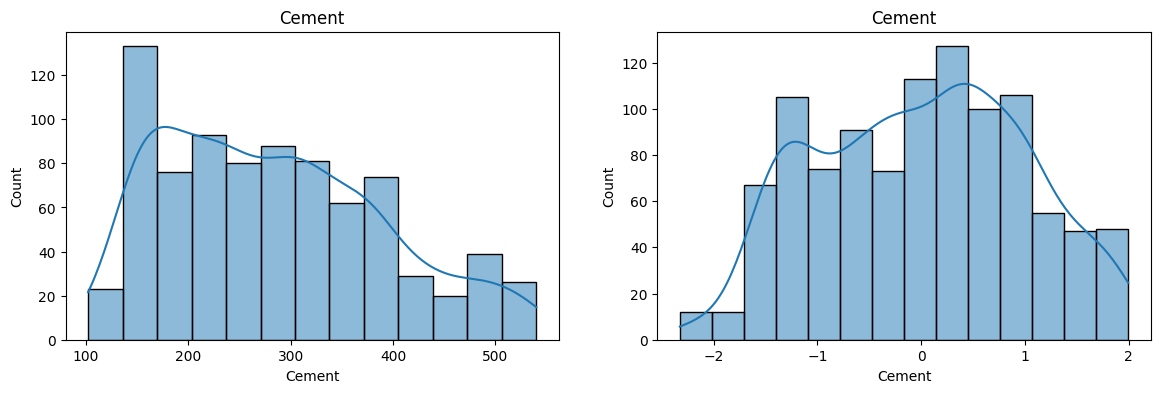

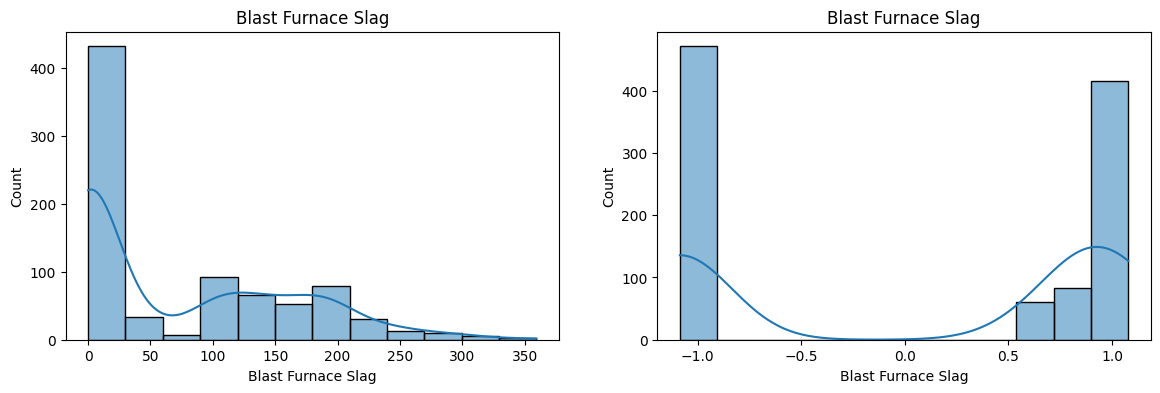

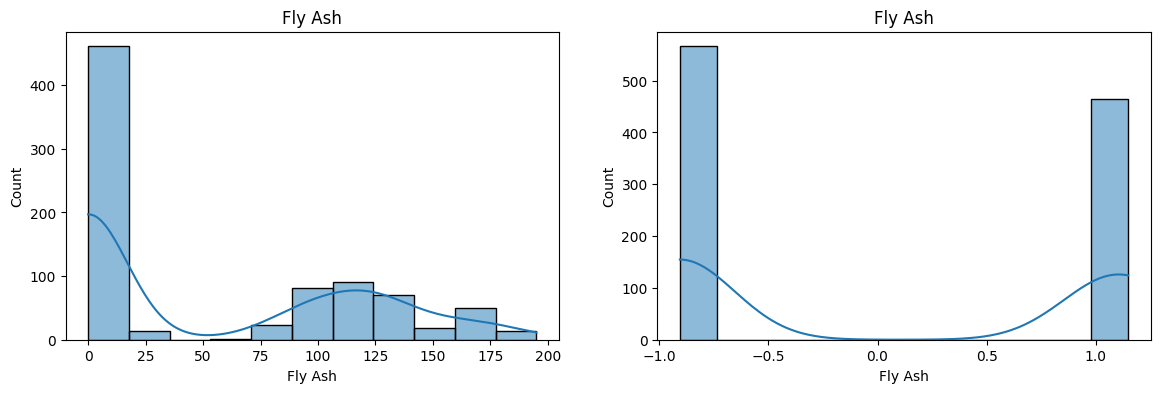

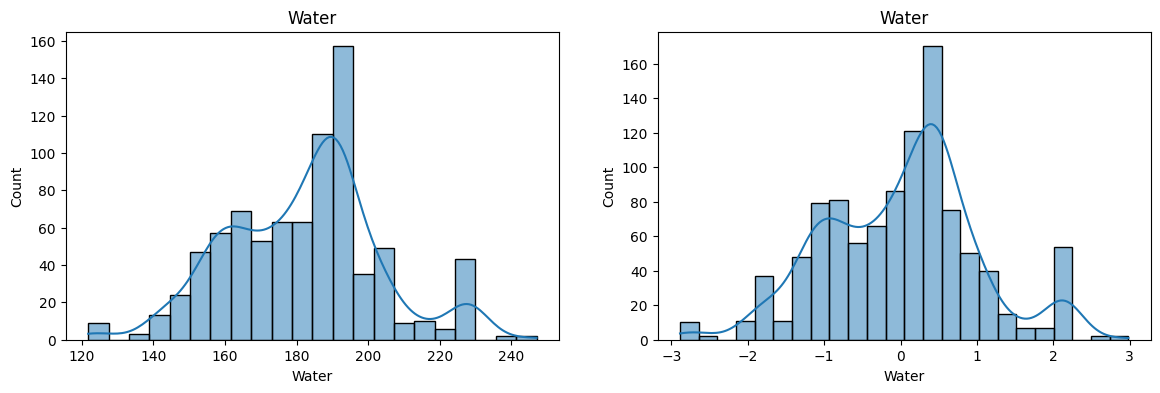

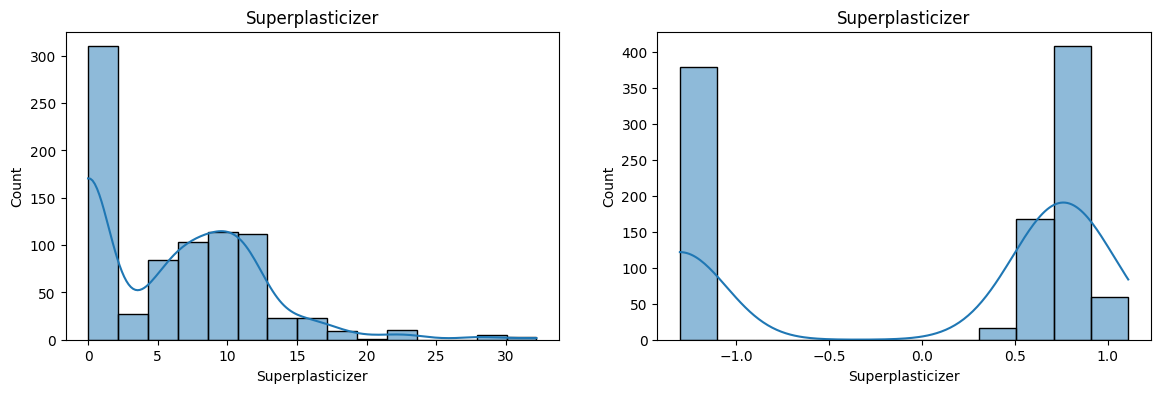

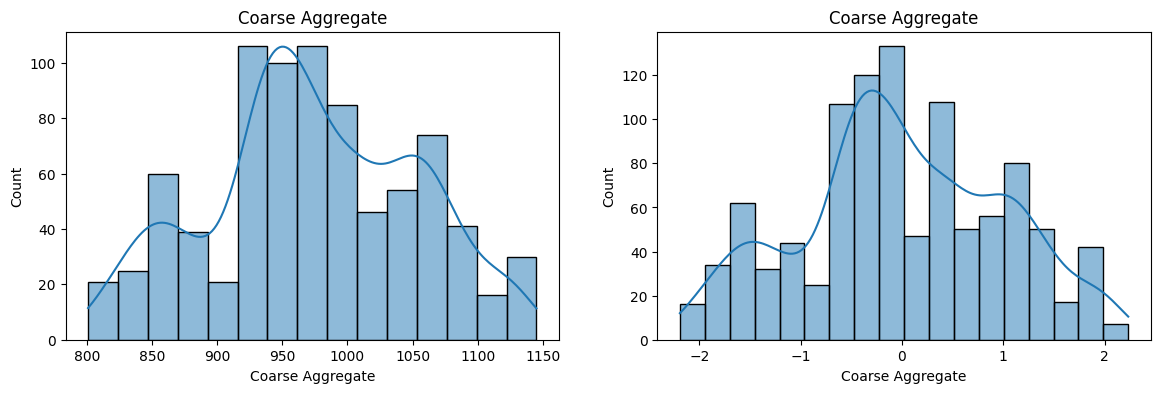

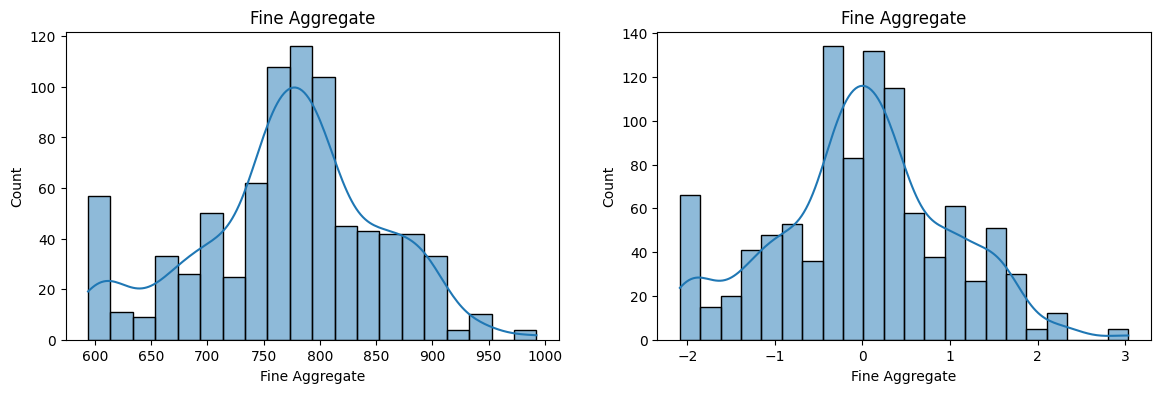

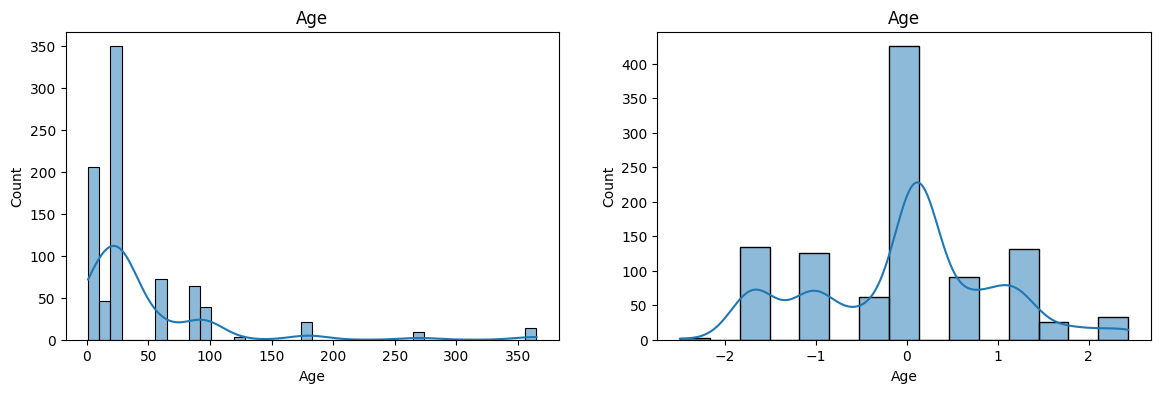

In [95]:
X_transformed = pd.DataFrame(X_transformed,columns = X_train.columns)

for col in X_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde = True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_transformed[col], kde = True)
    plt.title(col)
    plt.show()
    

# Applying Yeo-Jonhson

In [96]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed)

print(r2_score(y_test,y_pred3))
      
pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8123769983344095


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [97]:
#Applying Cross Val Score

pt1 = PowerTransformer()
X_transformed2 = pt1.fit_transform(X)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y, scoring= 'r2'))

np.float64(0.6834625141500864)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


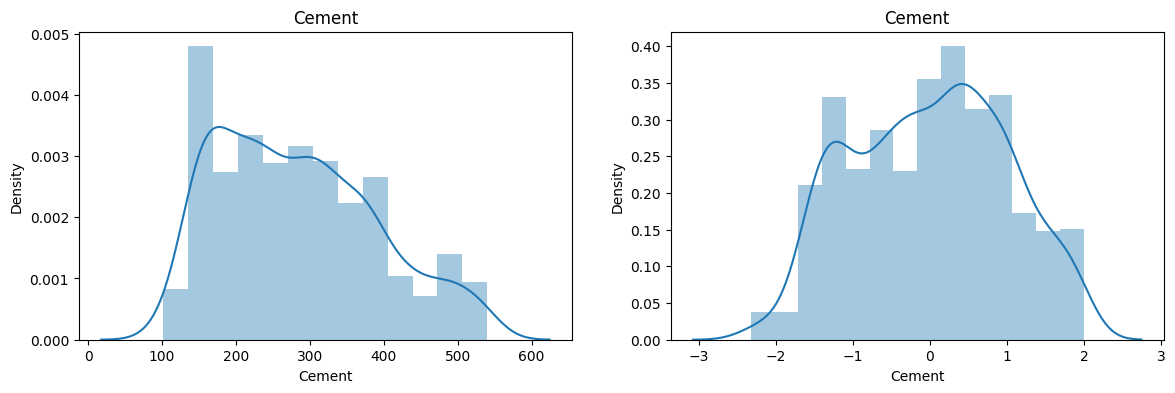

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


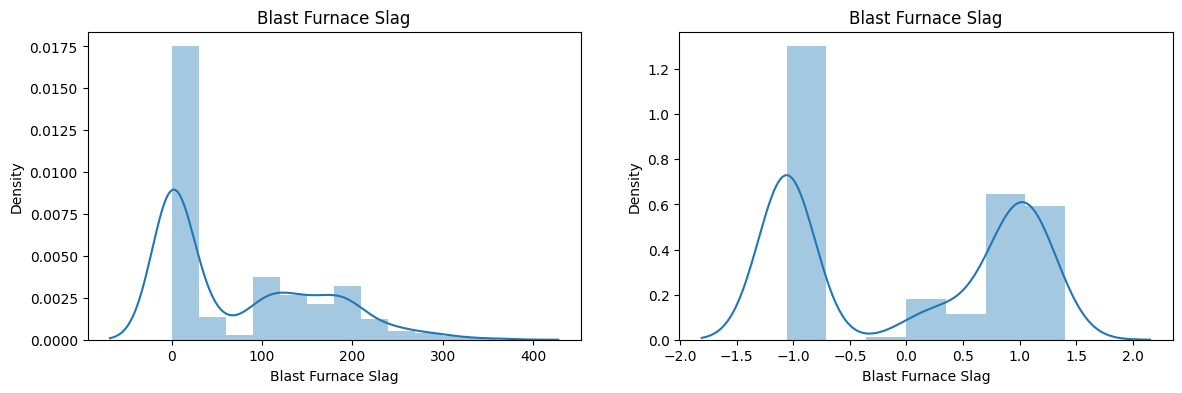

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


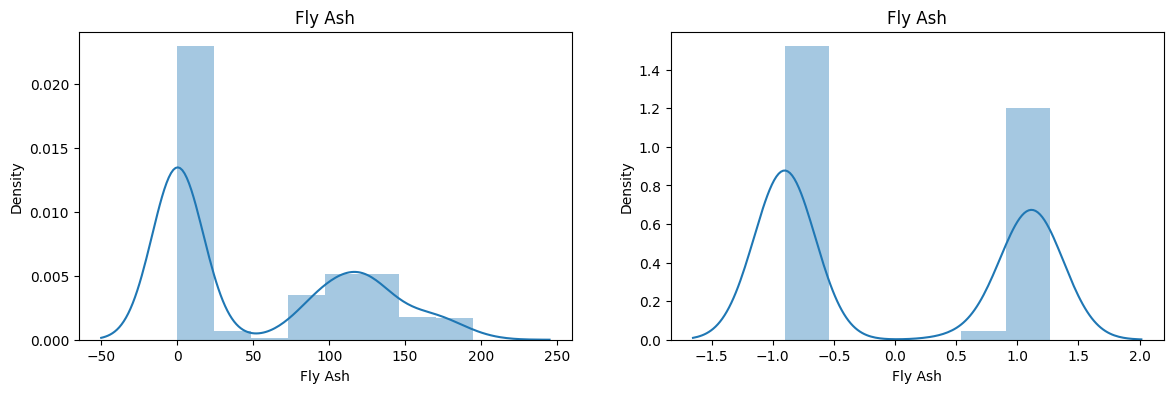

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


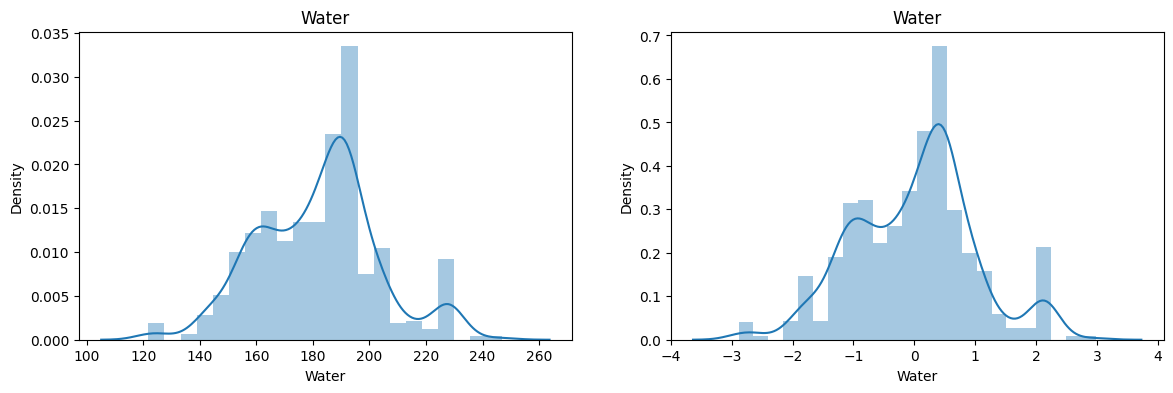

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


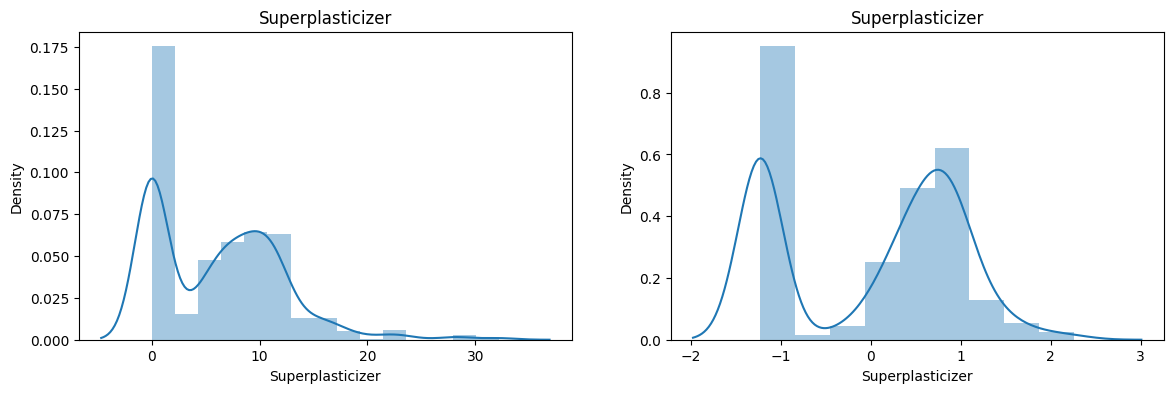

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


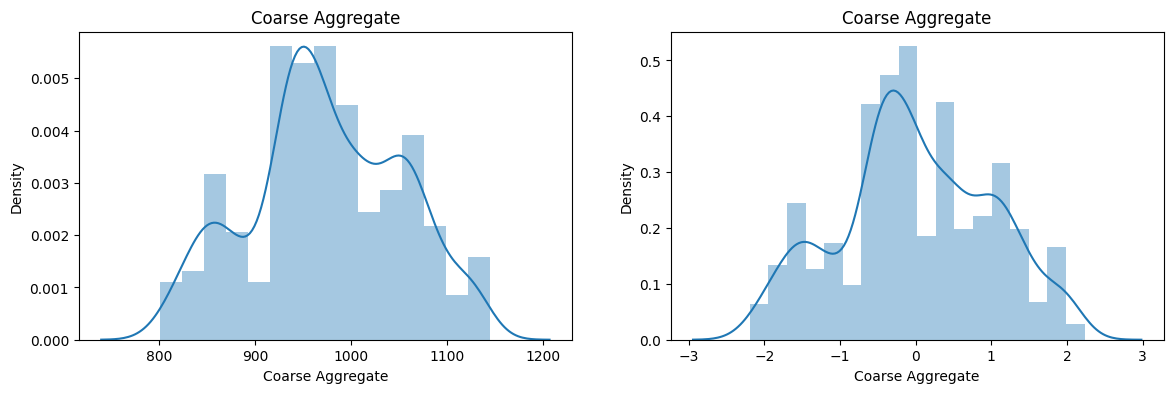

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


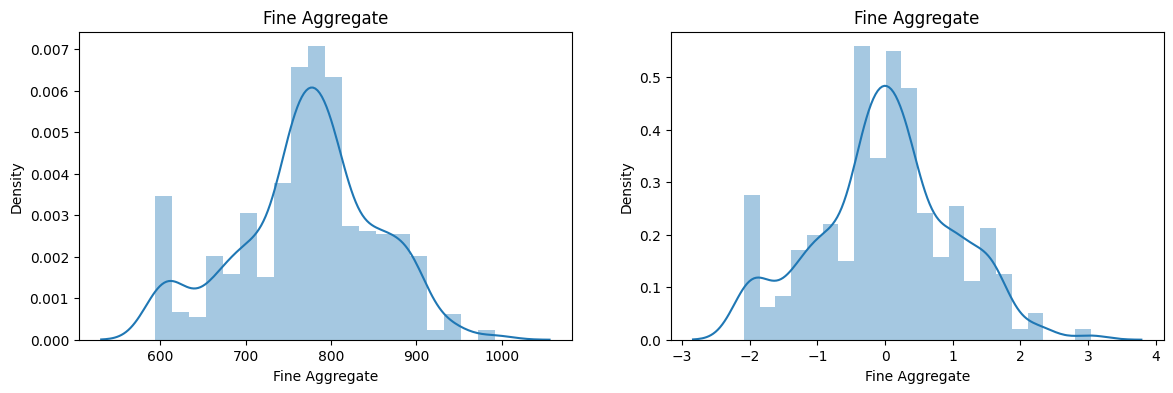

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13276\2696156180.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed2[col])


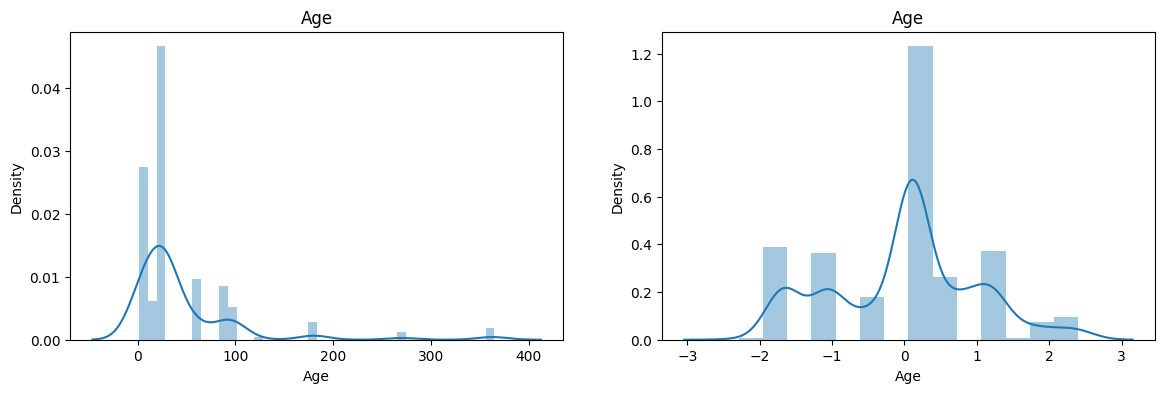

In [98]:
#Before and after comparision for Yeo-Johnson

X_transformed2 = pd.DataFrame(X_transformed2,columns = X_train.columns)

for col in X_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_transformed2[col])
    plt.title(col)
    plt.show()

In [99]:
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_, 'yeo_jonhson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,yeo_jonhson_lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771


# Power Transformations in Machine Learning

Power transformations help normalize data and make it more Gaussian-like, improving performance for models sensitive to skewed distributions (e.g., linear regression, logistic regression).


# 1. Power Transformer (General Method)
The PowerTransformer in scikit-learn applies Box-Cox or Yeo-Johnson transformations to reduce skewness in data.

method='box-cox' → Works only for positive values.

method='yeo-johnson' → Works for both positive and negative values.

Implementation Example

from sklearn.preprocessing import PowerTransformer
import numpy as np

# Sample data (skewed)
X = np.array([[1], [2], [3], [4], [5], [10], [100]]).astype(float)

# Apply Power Transformer (Yeo-Johnson by default)
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)

print(X_transformed)
# 2. Box-Cox Transformation
Only for positive values (
𝑥
>
0
x>0)

Adjusts skewness using the formula:

𝑥
′
=
𝑥
𝜆
−
1
𝜆
,
if 
𝜆
≠
0
x 
′
 = 
λ
x 
λ
 −1
​
 ,if λ

=0
𝑥
′
=
ln
⁡
(
𝑥
)
,
if 
𝜆
=
0
x 
′
 =ln(x),if λ=0
The best lambda (
𝜆
λ) is estimated from the data.

Used in log-normal data.

Example Usage
python
Copy
Edit
from scipy.stats import boxcox

# 3. Yeo-Johnson Transformation

Works for both positive and negative values.

Formula differs based on sign:

𝑥
′
=
(
𝑥
+
1
)
𝜆
−
1
𝜆
,
𝑥
≥
0
,
𝜆
≠
0
x 
′
 = 
λ
(x+1) 
λ
 −1
​
 ,x≥0,λ

=0
𝑥
′
=
−
(
−
𝑥
+
1
)
2
−
𝜆
−
1
2
−
𝜆
,
𝑥
<
0
,
𝜆
≠
2
x 
′
 =− 
2−λ
(−x+1) 
2−λ
 −1
​
 ,x<0,λ

=2
Best lambda (
𝜆
λ) is estimated automatically.

Useful when data contains zero or negative values.

Example Usage
python
Copy
Edit
from scipy.stats import yeojohnson

# Key Differences

Transformation	Works for Negative Values?	Works for Zero?	When to Use?
Power Transformer	Yes (Yeo-Johnson)	Yes (Yeo-Johnson)	General-purpose, data normalization

Box-Cox	❌ No	❌ No	Data must be strictly positive

Yeo-Johnson	✅ Yes	✅ Yes	Suitable for all real numbers

# When to Use Each?
Use Box-Cox if your data is strictly positive and skewed.

Use Yeo-Johnson if your data has negative, zero, or positive values.

Use Power Transformer in scikit-learn for automatic transformation.